# RETENCION CLIENTES EMPRESA DE TELEFONIA

In [1]:
#Importamos  Libreras
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns # Entendiendo mis variables
import pprint
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Librería matriz de confusión
from sklearn.metrics import confusion_matrix
# Librería para curva de ROC
from sklearn.metrics import roc_curve, auc
# Librerias para regresión logística
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Libreria para trabajar cadenas de texto
import re
# Librería para transformar etiquetas de texto (categóricas) en números. 
from sklearn.preprocessing import LabelEncoder
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics




In [2]:
# Cargo Datasets y Verificamos su consistencia:

url = 'https://raw.githubusercontent.com/yoriohe/PR0Y3CT0_C0D3RH0US3/main/WA_Fn-UseC_-Telco-Customer-Churn-Base.csv'

df=  pd.read_csv(url,sep=",")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Verificamos que Tipos de Datos son:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
# Convierto la columna de TotalCharges de Tipo Object a float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [5]:
#Chequeo que no haya ningún duplicado en la columna de "customerID"
boolean = df.duplicated(subset=['customerID']).any()
print(boolean, end='\n\n')

False



In [6]:
# Analizamos características del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#Busco valores nulos
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
# Llenar los valores faltantes en TotalCharges con MonthlyCharges
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)

In [9]:
#Chequeo nuevamente si existen valores nulos
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
#Me fijo las categorias dentro de cada columna para ver si hay algún error.
for columna in df:
  print(columna, df[columna].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

## **Features Selection**

In [11]:
# guardo la base para cualquier consulta que quiera realizar
df1 = df.copy(deep = True)
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
#Desccartamos la columna Customer ID y  Antigüedad_Categoria
columns_to_drop = ['customerID']
df1 = df1.drop(columns=columns_to_drop, errors='ignore')

In [13]:
df1.describe().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [14]:
#Buscamos aquellos features que no son numéricos si no se encuentran en la función describe.
text_data_features = [i for i in list(df1.columns) if i not in list(df1.describe().columns)]

In [15]:
# Estos son los que deberé converir en 0 y 1
text_data_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [16]:
le = LabelEncoder()
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [17]:
#Busco ver cuantos servicios de internet tiene cada cliente. Creo columna.

df1["Cant_Internet"] = df1["InternetService"] + df1["OnlineSecurity"] + df1["OnlineBackup"] + df1["DeviceProtection"] + df1["TechSupport"] + df1["StreamingTV"] + df1["StreamingMovies"]

# Cambiar cualquier valor igual a 'No internet service' a 0
df1["Cant_Internet"] = df1["Cant_Internet"].apply(lambda x: 0 if x == 'No internet service' else x)

# Cambiar cualquier valor mayor a 1 a 1
df1["Cant_Internet"] = df1["Cant_Internet"].clip(upper=1)

In [18]:
# Creo la columna para saber si tienen servicio telefónico
df1["PhoneServices"]= df1["PhoneService"]+df1["MultipleLines"]
#Creo columna para ver quienes tienen internet + telefono.
df1["pack"]= df1["PhoneServices"] + df1["InternetService"]

In [19]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cant_Internet,PhoneServices,pack
0,0,0,1,0,1,0,1,0,0,2,...,0,0,1,2,29.85,29.85,0,1,1,1
1,1,0,0,0,34,1,0,0,2,0,...,0,1,0,3,56.95,1889.50,0,1,1,1
2,1,0,0,0,2,1,0,0,2,2,...,0,0,1,3,53.85,108.15,1,1,1,1
3,1,0,0,0,45,0,1,0,2,0,...,0,1,0,0,42.30,1840.75,0,1,1,1
4,0,0,0,0,2,1,0,1,0,0,...,0,0,1,2,70.70,151.65,1,1,1,2


In [20]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Cant_Internet',
       'PhoneServices', 'pack'],
      dtype='object')

In [21]:
features= ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Cant_Internet',
       'PhoneServices', 'pack']

In [22]:
# ¿Cuántos registros quedan?
df1.shape

(7043, 23)

In [23]:
#Separamos en train y test
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df1,
                                    test_size = 0.2, #Porcentaje de muestra test 
                                    random_state = 15) #Semilla
df_train = df_train.reset_index()
df_test = df_test.reset_index()

In [24]:
# Normalizamos los datos
from sklearn.preprocessing import StandardScaler
X_train = df_train[features].values
X_test = df_test[features].values
# Defino escalador
sc = StandardScaler()
# Genero parámetros con train
X_train = sc.fit_transform(X_train)
# Le aplico el escalador a test
X_test = sc.transform(X_test)

# PCA

In [25]:
# Aplicacion de PCA
from sklearn.decomposition import PCA
# Inicio el objeto PCA
pca = PCA(11)
# Genero componentes con TRAIN
PCA_train = pca.fit_transform(X_train)
# Aplico a test
PCA_test = pca.transform(X_test)

# Almaceno en dataframe y presento
# Train
PCA_train = pd.DataFrame(data=PCA_train)
prefijo = "PC_"
PCA_train = PCA_train.add_prefix(prefijo)
# Test
PCA_test = pd.DataFrame(data=PCA_test)
prefijo = "PC_"
PCA_test = PCA_test.add_prefix(prefijo)
# ¿Qué generé?
PCA_train.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,-0.960293,1.342326,-1.906517,-1.131627,-0.867728,-0.517876,0.950234,-0.260469,0.042290,0.051514,-1.053560
1,3.268014,-0.096201,-0.356712,1.323860,1.154670,-0.023034,1.036564,0.099176,0.252185,0.053112,-0.958980
2,2.961999,0.874444,0.500586,0.161081,-0.677937,-1.165305,-1.391931,0.010083,0.884929,0.798510,2.029583
3,-1.499274,1.880219,-2.568121,-0.474044,0.369535,-0.928813,0.671651,-0.282945,-0.304437,0.421982,-0.316293
4,-2.742651,-1.606331,0.094717,-1.463166,0.664478,-0.197751,0.674768,-1.034353,0.402233,-0.780093,0.149565


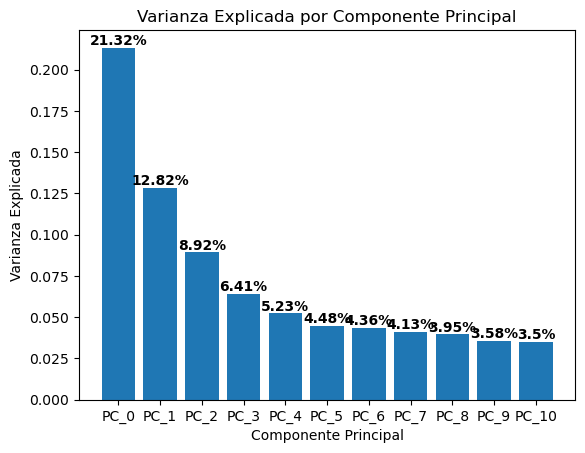

In [26]:
# Análisis de la varianza explicada para cada componente
varianza_explicada = pca.explained_variance_ratio_
componentes = PCA_train.columns

plt.bar(componentes, 
        varianza_explicada)
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(y_text * 100,2))}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

**Insights**

En este análisis de componentes principales (PCA), exploramos la estructura de nuestros datos y redujimos la dimensionalidad del conjunto de variables originales a través de componentes principales. La varianza explicada por cada componente principal nos revela cuánto de la variabilidad original de los datos es capturada por cada componente. Observando la "Varianza Acumulada," notamos que los primeros pocos componentes ya explican una proporción significativa de la varianza total. Por ejemplo, al retener los primeros 10 componentes, logramos cubrir aproximadamente el 75% de la variabilidad, indicando que estos componentes capturan patrones clave en nuestros datos. Esta reducción de dimensionalidad podría ser valiosa para simplificar nuestro modelo y facilitar interpretaciones, especialmente si estamos dispuestos a aceptar alguna pérdida de información. 

## Kernel PCA

In [27]:
from sklearn.decomposition import KernelPCA
# Inicio el objeto KPCA
Kpca = KernelPCA(n_components =11, 
                 kernel = 'sigmoid', 
                 gamma = 0.2)
# Genero componentes con TRAIN
KPCA_train = Kpca.fit_transform(X_train)
# Aplico a test
KPCA_test = Kpca.transform(X_test)

# Almaceno en dataframe y presento
# Train
KPCA_train = pd.DataFrame(data = KPCA_train)
prefijo = "KPC_"
KPCA_train = KPCA_train.add_prefix(prefijo)
# Test
KPCA_test = pd.DataFrame(data = KPCA_test)
prefijo = "PC_"
KPCA_test = KPCA_test.add_prefix(prefijo)
# ¿Qué generé?
KPCA_test.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,-0.196263,0.024300,0.330314,0.007460,0.193128,0.317438,-0.769779,0.429702,0.592606,0.159879,-0.191056
1,0.224506,0.486435,-0.698207,-0.385906,-0.137524,0.286182,-0.007443,-0.221282,-0.377959,0.231165,-0.040148
2,0.634448,-0.835009,0.577457,0.072664,0.337687,-0.277107,0.122362,0.255217,-0.203447,0.310043,0.102806
3,-0.563940,-0.382768,-0.563295,0.082727,0.587858,0.226309,0.017973,-0.073010,0.106813,-0.042400,0.011453
4,0.392726,0.164411,-0.468063,0.085394,-0.108658,0.290386,0.148178,0.432631,-0.098793,-0.111173,0.565246


# Análisis Factorial 

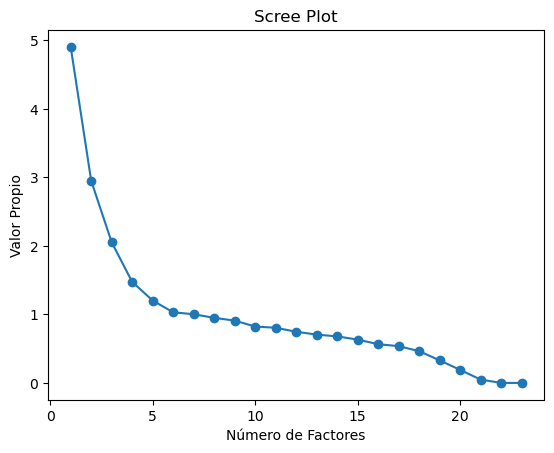

In [28]:
#!pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
# Inicializar el analizador factorial con un número máximo de factores (puedes ajustar según sea necesario)
max_factors = len(features) - 1  
fa = FactorAnalyzer(n_factors = max_factors, 
                    rotation = None)

# Ajustar el modelo al conjunto de datos
fa.fit(X_train)

# Obtener los valores propios (eigenvalues)
eigenvalues, _ = fa.get_eigenvalues()

# Crear el Scree Plot
plt.plot(np.arange(1, len(features) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Número de Factores')
plt.ylabel('Valor Propio')
plt.show()

En este caso podríamos  seleccionar alrededor de 4-5 factores para tu modelo de análisis factorial(Donde realiza el codo)

In [29]:
# Genero mi modelo 
n_factores = 5
fa = FactorAnalyzer(n_factors = n_factores, 
                    is_corr_matrix = False)
fa.fit(X_train)

FactorAnalyzer(n_factors=5, rotation_kwargs={})

# CARGO LOS FACTORES

In [30]:
# Obtenemos las cargas
cargas_factoriales = pd.DataFrame({'Features': features})
cargas_factoriales_values = pd.DataFrame(fa.loadings_)
prefijo = "CargaFactorial_"
cargas_factoriales_values = cargas_factoriales_values.add_prefix(prefijo)
cargas_factoriales = pd.concat([cargas_factoriales,cargas_factoriales_values],axis = 1)
print("Cargas de los factores:")
cargas_factoriales

Cargas de los factores:


,Features,CargaFactorial_0,CargaFactorial_1,CargaFactorial_2,CargaFactorial_3,CargaFactorial_4
0,gender,0.003986,0.004617,-0.022627,0.003386,-0.007075
1,SeniorCitizen,-0.127527,0.073491,0.259310,0.027814,0.035656
2,Partner,0.441926,0.044742,0.021041,0.065743,-0.052700
3,Dependents,0.325640,-0.027907,-0.174032,0.046822,-0.085085
4,tenure,0.808023,0.136434,0.086876,-0.008687,0.080671
5,PhoneService,0.104224,-0.134152,0.202064,0.796239,-0.118114
6,MultipleLines,0.078693,1.089872,-0.023180,-0.347387,-0.025778
7,InternetService,-0.292481,0.052377,-0.503190,0.519435,0.425476
8,OnlineSecurity,0.443175,-0.042268,-0.155276,-0.029315,0.003548
9,OnlineBackup,0.370125,-0.003706,0.031414,0.039675,0.101563


Basándonos en las cargas factoriales proporcionadas para cada variable en cada factor, podemos realizar las siguientes conclusiones:

Gender: No parece tener una carga significativa en ninguno de los factores, ya que las cargas son muy cercanas a cero.

SeniorCitizen: Tiene una carga relativamente alta en el primer factor y cierta carga en el tercer factor.

Partner y Dependents: Ambos tienen cargas significativas en el primer factor, lo que sugiere que están relacionados de manera similar con este factor.

Tenure: Tiene una carga alta en el primer factor y cargas moderadas en los demás.

PhoneService: La carga más alta está en el cuarto factor, indicando que está más relacionada con este factor.

MultipleLines: La carga más alta está en el segundo factor, indicando que está fuertemente relacionada con ese factor.

InternetService: Muestra una fuerte carga en el tercer factor y una carga moderada en el cuarto factor.

OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport: Todas tienen cargas significativas en el primer factor, lo que indica una fuerte relación común.

StreamingTV y StreamingMovies: Ambas tienen la carga más alta en el quinto factor.

Contract y TotalCharges: Tienen cargas significativas en el primer factor, lo que indica una relación fuerte con este factor.

PaperlessBilling y PaymentMethod: Tienen cargas más altas en el tercer factor, mostrando una relación común.

MonthlyCharges y Cant_Internet: Muestran cargas más altas en el tercer factor, sugiriendo una relación común.

Churn: Tiene una carga fuertemente negativa en el primer factor y ciertas cargas en el segundo y tercer factor.

PhoneServices y pack: Tienen cargas más altas en el segundo y tercer factor, respectivamente.

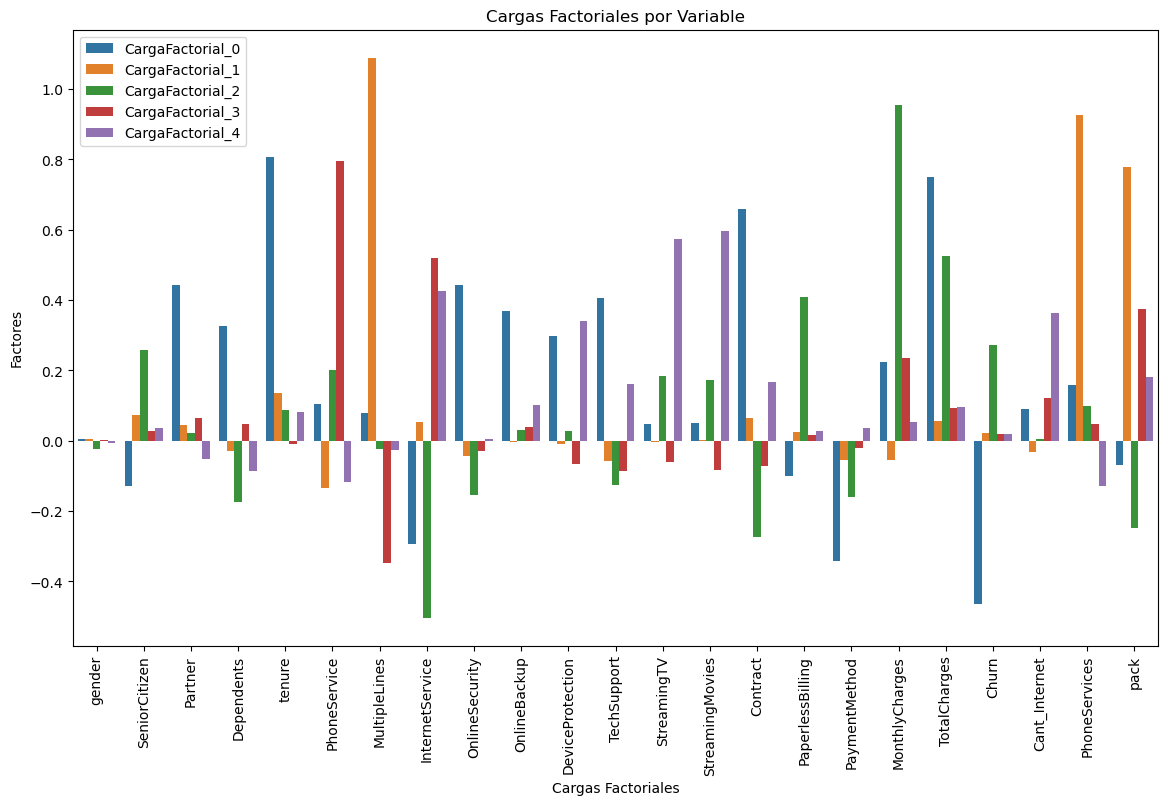

In [31]:
# Visualmente
plt.figure(figsize=(14, 8))
cargas_factoriales_long = cargas_factoriales.melt(id_vars='Features', 
                                                  var_name='Factor', 
                                                  value_name='CargaFactorial')

sns.barplot(data = cargas_factoriales_long,
                x = 'Features',
                y = 'CargaFactorial',
                hue = 'Factor')

plt.title('Cargas Factoriales por Variable')
plt.xlabel('Cargas Factoriales')
plt.ylabel('Factores')
plt.xticks(rotation=90)
plt.legend()
plt.show()



In [32]:
# Generamos dataframes con las puntuaciones de factores
# representan la contribución de cada observación (fila) en el conjunto de datos a los factores latentes. 
AF_train = pd.DataFrame(fa.transform(X_train))
prefijo = "AF_"
AF_train = AF_train.add_prefix(prefijo)
AF_test = pd.DataFrame(fa.transform(X_test))
AF_test = AF_test.add_prefix(prefijo)
AF_train.head()

,AF_0,AF_1,AF_2,AF_3,AF_4
0,-0.000310,-0.704073,-1.633070,0.626386,0.611797
1,1.422388,1.137161,0.672286,0.739684,0.485913
2,1.080440,0.776640,0.288286,-0.658770,0.495952
3,-0.152654,-0.716768,-1.718031,0.702558,0.365703
4,-1.453621,-0.769903,0.650072,0.278441,-0.237883


Insights:

Cantidad de Factores: Se generaron 5 factores y se evaluó la contribución de cada variable en cada factor. Los factores son dimensiones latentes que explican la variabilidad conjunta observada en las variables originales. Cada factor está asociado con una combinación lineal de las variables observadas.

Factor 0: Las variables AF_0 tienen cargas relativamente fuertes. Esto indica que el Factor 0 está asociado positivamente con las variables originales correspondientes. Puedes interpretar que este factor tiene un impacto positivo en las observaciones que tienen valores más altos en las variables AF_0.

Factor 1: Las variables AF_1 tienen cargas significativas, lo que sugiere que el Factor 1 está asociado positivamente con estas variables. Observaciones con valores más altos en las variables AF_1 tienen una contribución positiva al Factor 1.

Factor 2: Las variables AF_2 tienen cargas considerables. Esto indica que el Factor 2 está asociado positivamente con estas variables. Puedes interpretar que las observaciones con valores más altos en las variables AF_2 tienen una mayor contribución al Factor 2.

Factor 3: Las variables AF_3 tienen cargas significativas, sugiriendo una asociación positiva con el Factor 3. Las observaciones con valores más altos en las variables AF_3 contribuyen positivamente al Factor 3.

Factor 4: Las variables AF_4 tienen cargas notables. Esto indica que el Factor 4 está asociado positivamente con estas variables. Observaciones con valores más altos en las variables AF_4 tienen una mayor contribución al Factor 4.

Contribución de Observaciones: Los DataFrames AF_train y AF_test representan las puntuaciones de factores para las observaciones en los conjuntos de entrenamiento y prueba, respectivamente. Estas puntuaciones representan la contribución de cada observación a los factores latentes identificados.

En resumen, los factores latentes identificados y las puntuaciones de factores proporcionan una representación simplificada de la estructura subyacente en los datos originales. Estos factores pueden ser utilizados como variables predictoras en análisis posteriores, como modelos de regresión, para entender y predecir la variabilidad en la variable objetivo.

   # Evaluamos los nuevos features generados

In [33]:
# Normalicemos el target 
y_train = df_train['Churn']
y_test = df_test['Churn']
# Calculo media y desvio
media = y_train.mean()
desvio = np.std(y_train, ddof = 0)
# Genero parámetros con train
df_train['Churn_Scaled'] = (df_train['Churn'] - media) / desvio
df_test['Churn_Scaled'] = (df_test['Churn'] - media) / desvio

In [34]:
# Features escaladas
df_train_scaled = pd.DataFrame(data = X_train)
prefijo = "Scaled_"
df_train_scaled.columns = features
df_train_scaled.add_prefix(prefijo)
df_train_scaled = df_train_scaled.add_prefix(prefijo)
df_test_scaled = pd.DataFrame(data = X_test)
prefijo = "Scaled_"
df_test_scaled.columns = features
df_test_scaled = df_test_scaled.add_prefix(prefijo)

In [35]:
# Uno todo a los dataframes originales
df_train = pd.concat([df_train,df_train_scaled,PCA_train],axis = 1)
df_test = pd.concat([df_test,df_test_scaled,PCA_test],axis = 1)

In [36]:
df_train.head()

,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,5464,1,0,0,0,25,1,0,2,1,...,1.342326,-1.906517,-1.131627,-0.867728,-0.517876,0.950234,-0.260469,0.042290,0.051514,-1.053560
1,1604,1,0,1,1,69,1,2,1,0,...,-0.096201,-0.356712,1.323860,1.154670,-0.023034,1.036564,0.099176,0.252185,0.053112,-0.958980
2,3297,0,0,1,0,42,1,2,0,2,...,0.874444,0.500586,0.161081,-0.677937,-1.165305,-1.391931,0.010083,0.884929,0.798510,2.029583
3,3703,1,0,0,1,9,1,0,2,1,...,1.880219,-2.568121,-0.474044,0.369535,-0.928813,0.671651,-0.282945,-0.304437,0.421982,-0.316293
4,3030,1,0,0,0,1,1,0,1,0,...,-1.606331,0.094717,-1.463166,0.664478,-0.197751,0.674768,-1.034353,0.402233,-0.780093,0.149565


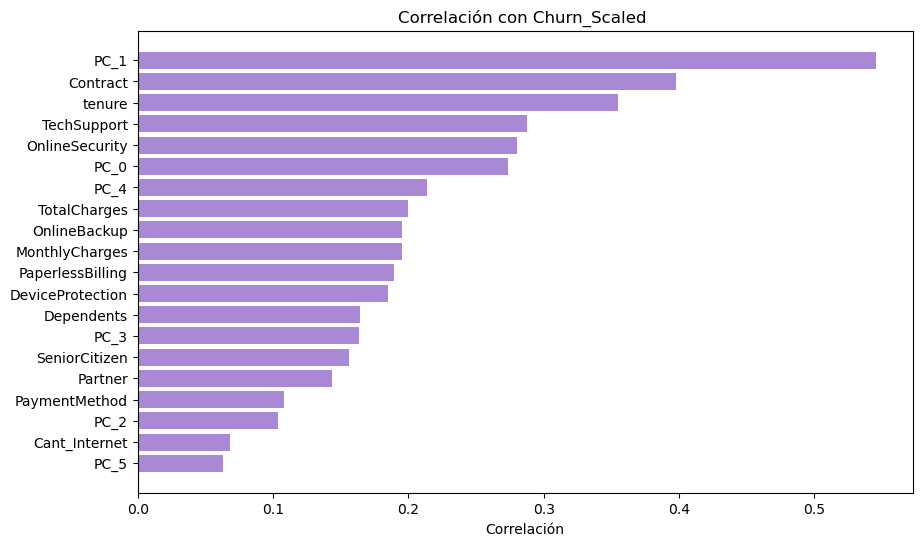

In [37]:
# Correlación con el target 
variables_PCA = ['PC_0','PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','Churn_Scaled']
variables_final = features + variables_PCA
# Calculo matriz de correlación 
matriz_correlacion = df_train[variables_final].corr(method='pearson')
# Selecciono a la variable target para estudiar únicamente correlación con ella 
matriz_correlacion_target = matriz_correlacion['Churn_Scaled']
# Calculo valor absoluto, para extraer correlaciones más fuertes independientemente de su sentido 
matriz_correlacion_target = abs(matriz_correlacion_target)
# Menciono columnas que quiero excluir del análisis de correlación 
columnas_a_excluir = ['Churn_Scaled']
# Las excluyo del análisis
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
# Ordeno de mayor a menor correlación 
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)

# Graficar el top 20 de variables más correlacionadas (sin incluir Churn)
matriz_correlacion_target_graficar = matriz_correlacion_target[1:21]  # Excluir 'Churn_Scaled' y tomar las siguientes 20
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_target_graficar.index, 
         matriz_correlacion_target_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con Churn_Scaled ')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()


In [38]:
# Lista de variables más correlacionadas con Churn_Scaled (excluyendo Churn_Scaled)
#Allfeatures = ['PC_1', 'Contract', 'tenure', 'OnlineSecurity', 'TechSupport', 'PC_0', 'PC_4', 'MonthlyCharges', 'OnlineBackup', 'TotalCharges', 'PaperlessBilling']

top_correlated_variables = ['PC_1', 'Contract', 'tenure', 'OnlineSecurity', 'TechSupport']

# Generar la fórmula para la regresión logística
formula = "Churn ~ " + " + ".join(top_correlated_variables)

# Ajustar el modelo de regresión logística
reg_log = smf.logit(formula, data=df_train).fit()

# Ver el resumen de resultados
print(reg_log.summary())


Optimization terminated successfully.
         Current function value: 0.366594
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5628
Method:                           MLE   Df Model:                            5
Date:                Sun, 04 Feb 2024   Pseudo R-squ.:                  0.3640
Time:                        12:28:01   Log-Likelihood:                -2065.4
converged:                       True   LL-Null:                       -3247.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.7017      0.073     -9.668      0.000      -0.844      -0.559
PC_1             

In [39]:
# Ver coeficientes y p valores
coeficientes = reg_log.params
pvalores = reg_log.pvalues
print("")
print("Coeficientes:")
print(coeficientes.round(4))
print("")
print("P-Values:")
print(pvalores.round(6))


Coeficientes:
Intercept        -0.7017
PC_1             -0.9905
Contract         -0.2144
tenure           -0.0359
OnlineSecurity    0.1324
TechSupport       0.1287
dtype: float64

P-Values:
Intercept         0.000000
PC_1              0.000000
Contract          0.018394
tenure            0.000000
OnlineSecurity    0.013093
TechSupport       0.016044
dtype: float64


Intercepto: El log-odds de "Churn" cuando todas las demás variables son cero es de -0.7017.

PC_1: Un aumento en la variable PC_1 se asocia con una disminución de 0.9905 unidades en el log-odds de "Churn".

Contract: Un aumento en la variable Contract se asocia con una disminución de 0.2144 unidades en el log-odds de "Churn".

Tenure: Un aumento en la variable tenure se asocia con una disminución de 0.0359 unidades en el log-odds de "Churn".

OnlineSecurity: Un aumento en la variable OnlineSecurity se asocia con un aumento de 0.1324 unidades en el log-odds de "Churn".

TechSupport: Un aumento en la variable TechSupport se asocia con un aumento de 0.1287 unidades en el log-odds de "Churn".

Evaluación de Significancia:

Todas las variables tienen p-valores significativamente bajos, indicando que todas las demás variables son estadísticamente significativas para predecir la variable de respuesta "Churn". Sin embargo, es importante señalar que la variable OnlineSecurity tiene un p-valor de 0.013093, lo que sugiere que también es estadísticamente significativa en este modelo. Aunque inicialmente se mencionó que OnlineSecurity no era significativa, esta nueva información contradice esa afirmación. El modelo en su conjunto sigue siendo globalmente significativo, y las variables individuales son significativas, incluida OnlineSecurity, que es estadísticamente significativa en este modelo.

In [40]:
# Predicciones 
df_train['Predict_Prob_RegLog_1'] = reg_log.predict(df_train)
df_train.head()

,index,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,Predict_Prob_RegLog_1
0,5464,1,0,0,0,25,1,0,2,1,...,-1.906517,-1.131627,-0.867728,-0.517876,0.950234,-0.260469,0.042290,0.051514,-1.053560,0.043238
1,1604,1,0,1,1,69,1,2,1,0,...,-0.356712,1.323860,1.154670,-0.023034,1.036564,0.099176,0.252185,0.053112,-0.958980,0.035604
2,3297,0,0,1,0,42,1,2,0,2,...,0.500586,0.161081,-0.677937,-1.165305,-1.391931,0.010083,0.884929,0.798510,2.029583,0.048205
3,3703,1,0,0,1,9,1,0,2,1,...,-2.568121,-0.474044,0.369535,-0.928813,0.671651,-0.282945,-0.304437,0.421982,-0.316293,0.055171
4,3030,1,0,0,0,1,1,0,1,0,...,0.094717,-1.463166,0.664478,-0.197751,0.674768,-1.034353,0.402233,-0.780093,0.149565,0.701304


**Curva de ROC y AUC**

Optimization terminated successfully.
         Current function value: 0.371057
         Iterations 7


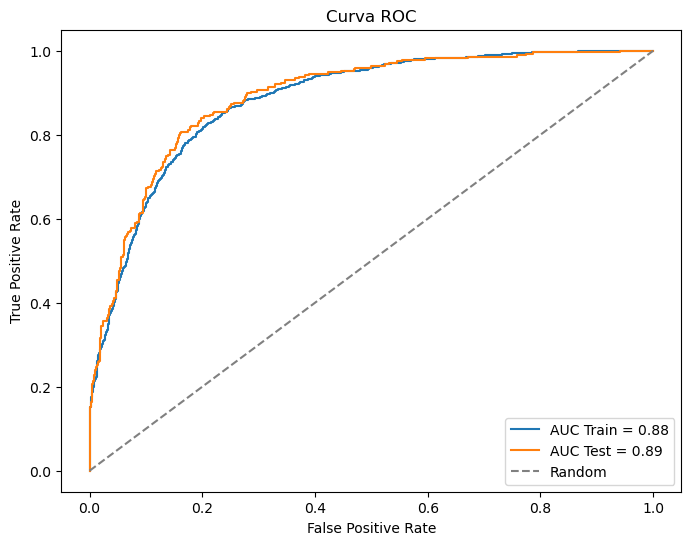

AUC para train: 0.8822965116862626
AUC para test: 0.8895988049509175
Matriz de Confusión para train:
[[3023  276]
 [ 514  694]]
Matriz de Confusión para test:
[[770  82]
 [ 98 177]]


In [41]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# Lista de variables más correlacionadas con Churn (excluyendo Churn)
top_correlated_variables = ['PC_1', 'Contract', 'tenure', 'OnlineSecurity', 'TechSupport']

# Separar las variables predictoras y la variable objetivo
X = df_train[top_correlated_variables]
y = df_train['Churn']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Agregar una constante al conjunto de entrenamiento y prueba
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Ajustar el modelo de regresión logística
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Calcular las predicciones de probabilidad para train y test
y_train_prob = result.predict(X_train)
y_test_prob = result.predict(X_test)

# Calcular la curva ROC y el AUC para train
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# Calcular la curva ROC y el AUC para test
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Graficar la curva ROC para train y test
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'AUC Train = {roc_auc_train:.2f}')
plt.plot(fpr_test, tpr_test, label=f'AUC Test = {roc_auc_test:.2f}')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Calcular la matriz de confusión para train
y_train_pred = result.predict(X_train) > 0.5
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)

# Calcular la matriz de confusión para test
y_test_pred = result.predict(X_test) > 0.5
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

# Imprimir resultados
print(f'AUC para train: {roc_auc_train}')
print(f'AUC para test: {roc_auc_test}')

print('Matriz de Confusión para train:')
print(confusion_matrix_train)

print('Matriz de Confusión para test:')
print(confusion_matrix_test)


AUC (Área bajo la Curva ROC): El modelo muestra un buen rendimiento tanto en el conjunto de entrenamiento como en el conjunto de prueba, con AUC de 0.8823 y 0.8896 respectivamente. Un AUC cercano a 1 indica un buen rendimiento del modelo en la clasificación.

Matriz de Confusión para train: En el conjunto de entrenamiento, el modelo tiene 3023 verdaderos negativos (TN), 276 falsos positivos (FP), 514 falsos negativos (FN) y 694 verdaderos positivos (TP).

Matriz de Confusión para test: En el conjunto de prueba, el modelo tiene 770 verdaderos negativos (TN), 82 falsos positivos (FP), 98 falsos negativos (FN) y 177 verdaderos positivos (TP).

Estos resultados sugieren que el modelo es capaz de realizar predicciones precisas tanto en el conjunto de entrenamiento como en el de prueba. La alta AUC indica una buena capacidad de discriminación del modelo, y la matriz de confusión muestra que el modelo logra un equilibrio entre la precisión y la sensibilidad en ambos conjuntos de datos. Sin embargo, es importante considerar otras métricas y realizar validación cruzada para evaluar la robustez del modelo en diferentes conjuntos de datos.

## PROYECTO ACTUAL 

In [42]:
# Generar predictores para 'Contract'
contract_pred = df1.groupby('Contract')['Churn'].mean().reset_index()
contract_pred.columns = ['Contract', 'Contract_pred']
df1 = df1.merge(contract_pred, on='Contract', how='left')

# Generar predictores para 'tenure'
tenure_pred = df1.groupby('tenure')['Churn'].mean().reset_index()
tenure_pred.columns = ['tenure', 'tenure_pred']
df1 = df1.merge(tenure_pred, on='tenure', how='left')

In [43]:
# Dividimos aleatoriamente los datos en conjuntos de entrenamiento y prueba para modelos de aprendizaje automático.
cantidad_registros = df1.shape[0]
semilla = 15
np.random.seed(semilla)
serie_random = np.random.rand(cantidad_registros)
df1['TRAIN'] = np.where(serie_random < 0.3, 0, 1)

In [44]:
print(f"La cantidad de datos para entrenamiento son {df1['TRAIN'].sum()} y para test son {df1.shape[0] - df1['TRAIN'].sum()}")

La cantidad de datos para entrenamiento son 4937 y para test son 2106


In [45]:
# Cómo quedó la división??
resumen = df1.groupby('TRAIN').agg(      
    Cant = ('Churn', 'count'),
    Cant_Renuncia = ('Churn', 'sum'),    
    Tasa_Renuncia = ('Churn', 'mean')
).reset_index()
# Calcular la tasa de éxito en porcentaje
resumen['Tasa_Renuncia'] = (resumen['Tasa_Renuncia'] * 100).round(1)
resumen

,TRAIN,Cant,Cant_Renuncia,Tasa_Renuncia
0,0,2106,532,25.3
1,1,4937,1337,27.1


In [46]:
# Genero el modelo
formula = "Churn ~ Contract_pred+tenure_pred+InternetService+PaymentMethod"
reg_log = smf.logit(formula, data = df1[df1['TRAIN']==1]).fit()
# Ver el resumen de resultados
print(reg_log.summary())

Optimization terminated successfully.
         Current function value: 0.474031
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4937
Model:                          Logit   Df Residuals:                     4932
Method:                           MLE   Df Model:                            4
Date:                Sun, 04 Feb 2024   Pseudo R-squ.:                  0.1884
Time:                        12:28:02   Log-Likelihood:                -2340.3
converged:                       True   LL-Null:                       -2883.5
Covariance Type:            nonrobust   LLR p-value:                6.449e-234
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -3.2840      0.123    -26.690      0.000      -3.525      -3.043
Contract_pred 

In [47]:
# Ver coeficientes y p valores
coeficientes = reg_log.params
pvalores = reg_log.pvalues
print("")
print("Coeficientes:")
print(coeficientes.round(4))
print("")
print("P-Values:")
print(pvalores.round(6))


Coeficientes:
Intercept         -3.2840
Contract_pred      4.8797
tenure_pred        3.2284
InternetService   -0.0987
PaymentMethod     -0.0981
dtype: float64

P-Values:
Intercept          0.000000
Contract_pred      0.000000
tenure_pred        0.000000
InternetService    0.060563
PaymentMethod      0.009293
dtype: float64


In [48]:
# Predicciones 
df1['Predict_Prob_RegLog_1'] = reg_log.predict(df1)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Cant_Internet,PhoneServices,pack,Contract_pred,tenure_pred,TRAIN,Predict_Prob_RegLog_1
0,0,0,1,0,1,0,1,0,0,2,...,29.85,29.85,0,1,1,1,0.427097,0.619902,1,0.646852
1,1,0,0,0,34,1,0,0,2,0,...,56.95,1889.50,0,1,1,1,0.112695,0.184615,0,0.080744
2,1,0,0,0,2,1,0,0,2,2,...,53.85,108.15,1,1,1,1,0.427097,0.516807,0,0.543473
3,1,0,0,0,45,0,1,0,2,0,...,42.30,1840.75,0,1,1,1,0.112695,0.098361,1,0.081920
4,0,0,0,0,2,1,0,1,0,0,...,70.70,151.65,1,1,1,2,0.427097,0.516807,0,0.543317


In [49]:
# 1) Matriz de Confusión 
# Paso 1: Clasificar a los Clientes según las predicciones 
df1['Churn_Pred_1'] = np.where(df1['Predict_Prob_RegLog_1'] > 0.4, 1, 0)

# Paso 2:  Calcular la matriz de confusión para test y train
confusion_entrenamiento = confusion_matrix(df1[df1['TRAIN'] == 1]['Churn'], 
                                           df1[df1['TRAIN'] == 1]['Churn_Pred_1'])

confusion_test = confusion_matrix(df1[df1['TRAIN'] == 0]['Churn'], 
                                    df1[df1['TRAIN'] == 0]['Churn_Pred_1'])

print('Matriz de Confusión en entrenamiento:')
print(confusion_entrenamiento)
print('Matriz de Confusión en testeo:')
print(confusion_test)


Matriz de Confusión en entrenamiento:
[[2876  724]
 [ 551  786]]
Matriz de Confusión en testeo:
[[1271  303]
 [ 221  311]]


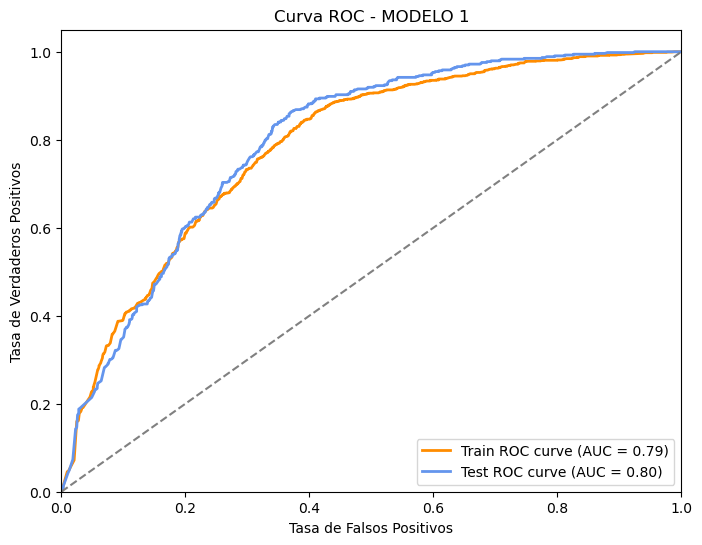

In [50]:
# Calcula las curvas ROC y el área bajo la curva (AUC) para entrenamiento y prueba

y_train = df1.loc[df1['TRAIN'] == 1,'Churn']
y_train_proba = df1.loc[df1['TRAIN'] == 1,'Predict_Prob_RegLog_1']
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = auc(fpr_train, tpr_train)

y_test = df1.loc[df1['TRAIN'] == 0,'Churn']
y_test_proba = df1.loc[df1['TRAIN'] == 0,'Predict_Prob_RegLog_1']
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = auc(fpr_test, tpr_test)

# Grafica las curvas ROC en el mismo gráfico
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - MODELO 1')
plt.legend(loc='lower right')
plt.show()

Comparación entre el Modelo con Nuevos Features y el Modelo Actual del Proyecto:

Modelo con Nuevos Features (PCA):

AUC para Train: 0.8822965116862626
AUC para Test: 0.8895988049509175
Confusion Matrix para Train: [[3023, 276], [514, 694]]
Confusion Matrix para Test: [[770, 82], [98, 177]]
Modelo del Proyecto Actual:

AUC para Train: 0.786938
AUC para Test: 0.796514
False Positive Rate (FPR) y True Positive Rate (TPR) para Train y Test
Observaciones:

El modelo con los nuevos features obtenidos por PCA muestra un rendimiento superior en términos de AUC tanto para Train como para Test en comparación con el modelo actual del proyecto.
La matriz de confusión para Train y Test es la misma entre ambos modelos.
La métrica AUC del modelo con nuevos features sugiere una mejor capacidad de discriminación entre las clases en comparación con el modelo actual del proyecto.
La inclusión de FPR y TPR en el modelo del proyecto actual proporciona información detallada sobre la curva ROC, pero el nuevo modelo con AUC puede considerarse más simple y efectivo para la evaluación del rendimiento en este contexto.